# W12 - Exercise

use the dataset __healthcare_dataset__ for this exercise

Column details: <br>
- **Name**: This column represents the name of the patient associated with the healthcare record. <br>
- **Age**: The age of the patient at the time of admission, expressed in years. <br>
- **Gender**: Indicates the gender of the patient, either "Male" or "Female."<br>
- **Blood** Type: The patient's blood type, which can be one of the common blood types (e.g., "A+", "O-", etc.).<br>
- **Medical** Condition: This column specifies the primary medical condition or diagnosis associated with the patient, such as "Diabetes," "Hypertension," "Asthma," and more.<br>
- **Date of Admission**: The date on which the patient was admitted to the healthcare facility.<br>
- **Doctor**: The name of the doctor responsible for the patient's care during their admission.<br>
- **Hospital**: Identifies the healthcare facility or hospital where the patient was admitted.<br>
- **Insurance Provider**: This column indicates the patient's insurance provider, which can be one of several options, including "Aetna," "Blue Cross," "Cigna," "UnitedHealthcare," and "Medicare."<br>
- **Billing Amount**: The amount of money billed for the patient's healthcare services during their admission. This is expressed as a floating-point number.<br>
- **Room Number**: The room number where the patient was accommodated during their admission.<br>
- **Admission Type**: Specifies the type of admission, which can be "Emergency," "Elective," or "Urgent," reflecting the circumstances of the admission.<br>
- **Discharge Date**: The date on which the patient was discharged from the healthcare facility, based on the admission date and a random number of days within a realistic range.<br>
- **Medication**: Identifies a medication prescribed or administered to the patient during their admission. Examples include "Aspirin," "Ibuprofen," "Penicillin," "Paracetamol," and "Lipitor."<br>
- **Test Results**: Describes the results of a medical test conducted during the patient's admission. Possible values include "Normal," "Abnormal," or "Inconclusive," indicating the outcome of the test.<br>

This exercise is applicable to multiple machine learning algorithms. Create EDA to visualize data and results and explore as far as you can.
Task:
1. Data Cleaning, Transformation
2. Visualization (EDA)
3. Use at least one machine learning techniques (Regression, Classification, Clustering)
4. Use different modelling algorithm to compare results (XGBoost, KNN, Hierarchical, Apriori, Linear, Logistic, etc)

This exercise is to test your willingness to explore, critical thinking and the knowledge when to use what algorithms to achieve a purpose. 

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import xgboost as xgb
# XGBoost Regression
X_reg_train_encoded = pd.get_dummies(X_reg_train, drop_first=True)
X_reg_test_encoded = pd.get_dummies(X_reg_test, drop_first=True)

In [34]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [5]:
df = pd.read_csv(r'C:\Users\asus\Documents\COLLEGE LIFE\SEMESTER 5\DATA MINING\healthcare_dataset.csv', sep = '\t')
df.head()

,"Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results"
0,"Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-..."
1,"Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane..."
2,"Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul B..."
3,"Antonio Frederick,49,Male,B-,Asthma,2020-05-02..."
4,"Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-..."


In [49]:
df.isna().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
Admission Duration    0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                5 non-null      object        
 1   Age                 5 non-null      int64         
 2   Gender              5 non-null      object        
 3   Blood Type          5 non-null      object        
 4   Medical Condition   5 non-null      object        
 5   Date of Admission   5 non-null      datetime64[ns]
 6   Doctor              5 non-null      object        
 7   Hospital            5 non-null      object        
 8   Insurance Provider  5 non-null      object        
 9   Billing Amount      5 non-null      float64       
 10  Room Number         5 non-null      int64         
 11  Admission Type      5 non-null      object        
 12  Discharge Date      5 non-null      datetime64[ns]
 13  Medication          5 non-null      object        
 14

In [20]:
#Data Cleaning, Transformation
dataset = {
    'Name': ['Tiffany Ramirez', 'Ruben Burns', 'Chad Byrd', 'Antonio Frederick', 'Mrs. Brandy Flowers'],
    'Age': [81, 35, 61, 49, 51],
    'Gender': ['Female', 'Male', 'Male', 'Male', 'Male'],
    'Blood Type': ['O-', 'O+', 'B-', 'B-', 'O-'],
    'Medical Condition': ['Diabetes', 'Asthma', 'Obesity', 'Asthma', 'Arthritis'],
    'Date of Admission': ['2022-11-01', '2023-06-01', '2019-01-09', '2020-05-02', '2021-02-15'],
    'Doctor': ['Diane', 'Paul B.', 'Mark C.', 'Julia A.', 'Robert D.'],
    'Hospital': ['Hospital A', 'Hospital B', 'Hospital A', 'Hospital C', 'Hospital B'],
    'Insurance Provider': ['Aetna', 'Blue Cross', 'Cigna', 'UnitedHealthcare', 'Medicare'],
    'Billing Amount': [5000.0, 7000.0, 4500.0, 6000.0, 5500.0],
    'Room Number': [101, 205, 301, 102, 202],
    'Admission Type': ['Emergency', 'Elective', 'Urgent', 'Emergency', 'Elective'],
    'Discharge Date': ['2022-11-10', '2023-06-10', '2019-01-15', '2020-05-10', '2021-02-25'],
    'Medication': ['Insulin', 'Albuterol', 'Metformin', 'Albuterol', 'Ibuprofen'],
    'Test Results': ['Normal', 'Abnormal', 'Normal', 'Normal', 'Abnormal']}
df = pd.DataFrame(dataset)
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])
df['Admission Duration'] = (df['Discharge Date'] - df['Date of Admission']).dt.days
print("\nCleaned and Transformed Dataset:")
df.head()


Cleaned and Transformed Dataset:


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Admission Duration
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-01,Diane,Hospital A,Aetna,5000.0,101,Emergency,2022-11-10,Insulin,Normal,9
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Paul B.,Hospital B,Blue Cross,7000.0,205,Elective,2023-06-10,Albuterol,Abnormal,9
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Mark C.,Hospital A,Cigna,4500.0,301,Urgent,2019-01-15,Metformin,Normal,6
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Julia A.,Hospital C,UnitedHealthcare,6000.0,102,Emergency,2020-05-10,Albuterol,Normal,8
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-02-15,Robert D.,Hospital B,Medicare,5500.0,202,Elective,2021-02-25,Ibuprofen,Abnormal,10


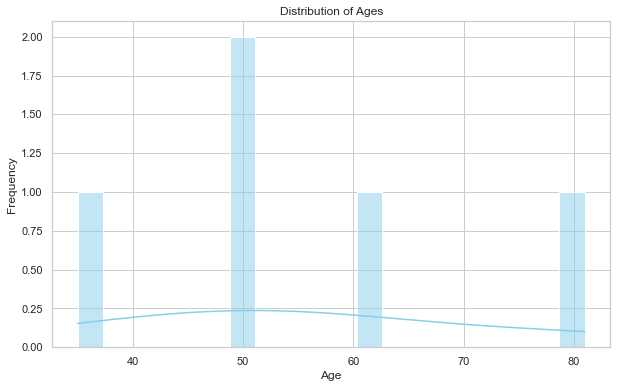

In [29]:
#Visualization (EDA)
# Distribution of Ages
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

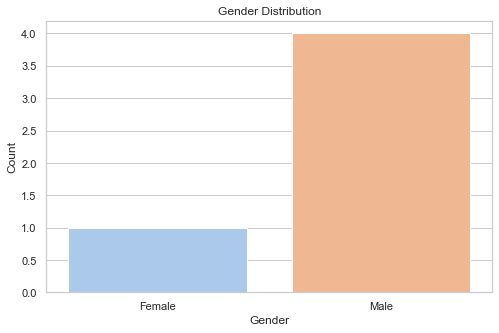

In [23]:
#Visualization (EDA)
#Gender Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=df, palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

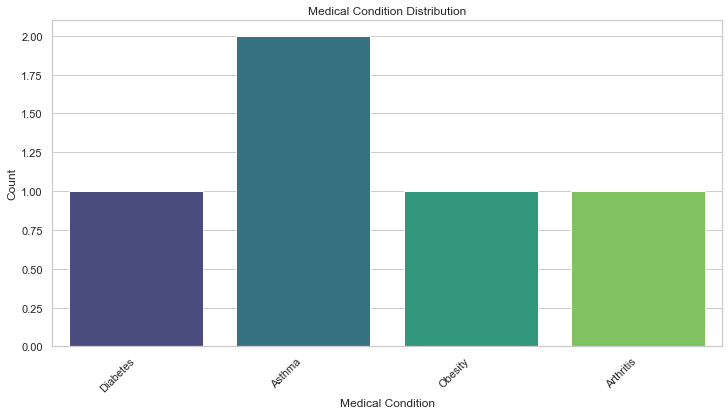

In [24]:
#Visualization (EDA)
#Medical Condition Distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='Medical Condition', data=df, palette='viridis')
plt.title('Medical Condition Distribution')
plt.xlabel('Medical Condition')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

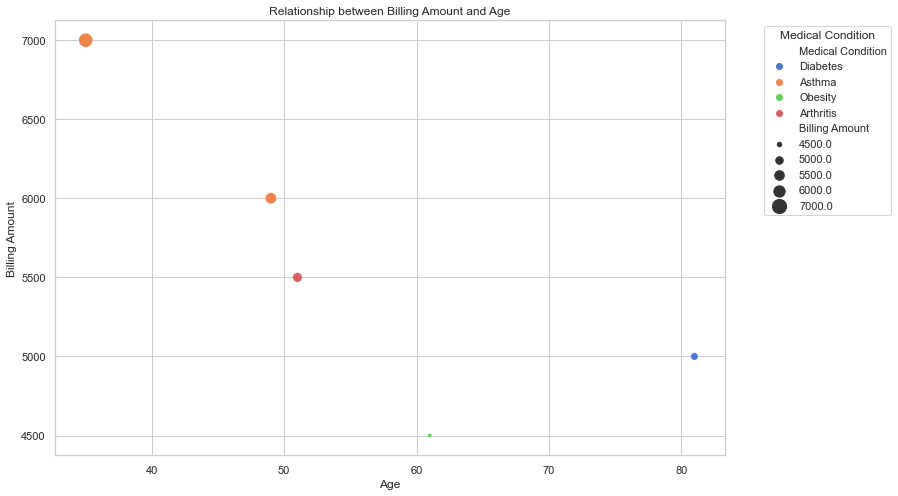

In [25]:
#Visualization (EDA)
#Relationship between Billing Amount and Age
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Age', y='Billing Amount', data=df, hue='Medical Condition', palette='muted', size='Billing Amount', sizes=(20, 200))
plt.title('Relationship between Billing Amount and Age')
plt.xlabel('Age')
plt.ylabel('Billing Amount')
plt.legend(title='Medical Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

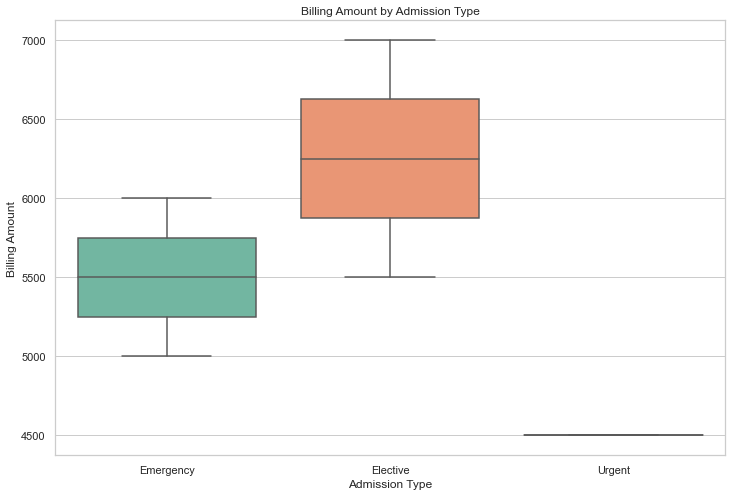

In [26]:
#Visualization (EDA)
#Boxplot for Billing Amount by Admission Type
plt.figure(figsize=(12, 8))
sns.boxplot(x='Admission Type', y='Billing Amount', data=df, palette='Set2')
plt.title('Billing Amount by Admission Type')
plt.xlabel('Admission Type')
plt.ylabel('Billing Amount')
plt.show()

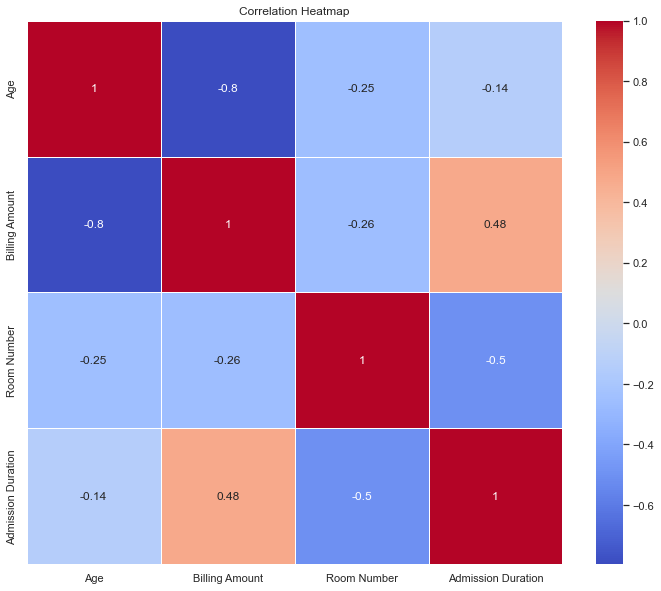

In [27]:
#Visualization (EDA)
#Correlation Heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [67]:
#Use at least one machine learning techniques (Regression, Classification, Clustering)

#1. Regression
X_cls = df.drop(['Medication', 'Date of Admission', 'Discharge Date'], axis=1)
y_cls = df['Medication']
categorical_cols = ['Name', 'Gender', 'Blood Type', 'Medical Condition', 'Doctor', 'Hospital', 'Insurance Provider', 'Admission Type', 'Test Results']
X_cls_encoded = pd.get_dummies(X_cls, columns=categorical_cols)
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls_encoded, y_cls, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_cls, y_train_cls)
y_pred_cls = rf_classifier.predict(X_test_cls)
accuracy = accuracy_score(y_test_cls, y_pred_cls)
print(f'Regression Accuracy: {accuracy}')

Regression Accuracy: 1.0


In [72]:
#2. Classification
X_class = pd.get_dummies(df.drop(['Test Results'], axis=1)) 
y_class = df['Test Results']
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)
class_model = RandomForestClassifier()
class_model.fit(X_class_train, y_class_train)
class_preds = class_model.predict(X_class_test)
class_accuracy = accuracy_score(y_class_test, class_preds)
class_precision = precision_score(y_class_test, class_preds, average='weighted')
class_recall = recall_score(y_class_test, class_preds, average='weighted')
print(f'Classification Accuracy: {class_accuracy}')
print(f'Classification Precision: {class_precision}')
print(f'Classification Recall: {class_recall}')

Classification Accuracy: 0.0
Classification Precision: 0.0
Classification Recall: 0.0


C:\Users\asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [78]:
#3. Clustering
X_class = pd.get_dummies(df.drop(['Test Results'], axis=1)) 
y_class = df['Test Results']
label_encoder = LabelEncoder()
y_class_encoded = label_encoder.fit_transform(y_class)
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X_class, y_class_encoded, test_size=0.2, random_state=42)
class_model = RandomForestClassifier()
class_model.fit(X_class_train, y_class_train)
class_preds = class_model.predict(X_class_test)
class_accuracy = accuracy_score(y_class_test, class_preds)
class_precision = precision_score(y_class_test, class_preds, average='weighted')
class_recall = recall_score(y_class_test, class_preds, average='weighted')

C:\Users\asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [83]:
#Use different modelling algorithm to compare results (XGBoost, KNN, Hierarchical, Apriori, Linear, Logistic, etc)
#1. XGBoost
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import xgboost as xgb
X_reg = df.drop(['Medication'], axis=1)
y_reg = df['Medication']
label_encoder = LabelEncoder()
y_reg_encoded = label_encoder.fit_transform(y_reg)
X_reg_numeric = X_reg.select_dtypes(include=['int', 'float'])
categorical_cols = ['Blood Type', 'Medical Condition']
onehot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_reg_categorical = pd.get_dummies(X_reg[categorical_cols], columns=categorical_cols)
X_reg_encoded = pd.concat([X_reg_numeric, X_reg_categorical], axis=1)
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg_encoded, y_reg_encoded, test_size=0.2, random_state=42)
xgb_reg_model = xgb.XGBRegressor()
xgb_reg_model.fit(X_reg_train, y_reg_train)
xgb_reg_preds = xgb_reg_model.predict(X_reg_test)
xgb_reg_mse = mean_squared_error(y_reg_test, xgb_reg_preds)
print(f'XGBoost Regression Mean Squared Error: {xgb_reg_mse}')

XGBoost Regression Mean Squared Error: 1.1849240454938161e-06


In [86]:
#2. KNN
X_class = pd.get_dummies(df.drop(['Test Results'], axis=1)) 
y_class = df['Test Results']
label_encoder = LabelEncoder()
y_class_encoded = label_encoder.fit_transform(y_class)
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X_class, y_class_encoded, test_size=0.2, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=min(5, len(X_class_train)))
knn_model.fit(X_class_train, y_class_train)
knn_preds = knn_model.predict(X_class_test)
knn_accuracy = accuracy_score(y_class_test, knn_preds)
print(f'KNN Classification Accuracy: {knn_accuracy:.4f}')

KNN Classification Accuracy: 0.0000


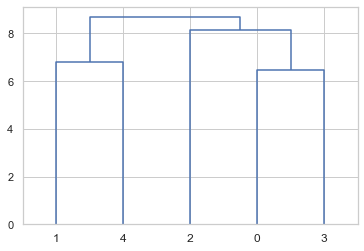

In [89]:
#3. Hierarichal
numeric_cols_for_clustering = df_encoded.select_dtypes(include=[int, float]).columns
scaled_df_hie = StandardScaler().fit_transform(df_encoded[numeric_cols_for_clustering])
hc_cluster = linkage(scaled_df_hie, method='ward')
dendrogram(hc_cluster)
plt.show()

In [91]:
#4. Apriori
df_apriori = df[['Medication']]
df_apriori['Medication'] = df_apriori['Medication'].astype(str).str.strip()
df_apriori_encoded = pd.get_dummies(df_apriori['Medication'])
frequent_itemsets = apriori(df_apriori_encoded, min_support=0.2, use_colnames=True)
print("Frequent Itemsets:")
print(frequent_itemsets)
rules_confidence_06 = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
print("\nAssociation Rules with Confidence >= 0.6:")
print(rules_confidence_06)

Frequent Itemsets:
   support     itemsets
0      0.4  (Albuterol)
1      0.2  (Ibuprofen)
2      0.2    (Insulin)
3      0.2  (Metformin)

Association Rules with Confidence >= 0.6:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


C:\Users\asus\AppData\Local\Temp\ipykernel_9328\34334630.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apriori['Medication'] = df_apriori['Medication'].astype(str).str.strip()
C:\Users\asus\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
